In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pd.options.display.float_format = '{.2f}'.format

In [2]:
df = pd.read_csv('US_baby_names.csv')
print(df.shape)
df

(2052781, 4)


,Year,Names,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2052776,2021,Zyeire,M,5
2052777,2021,Zyel,M,5
2052778,2021,Zyian,M,5
2052779,2021,Zylar,M,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052781 entries, 0 to 2052780
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Names   object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 62.6+ MB


In [4]:
df.nunique()

Year         142
Names     101338
Gender         2
Count      13854
dtype: int64

In [5]:
# Because gender has only two values we opt to change it to 'category'

df.Gender = df.Gender.astype('category')

In [6]:
# This step made the memory reduce from 62.6 mb to 48.9 mb

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052781 entries, 0 to 2052780
Data columns (total 4 columns):
 #   Column  Dtype   
---  ------  -----   
 0   Year    int64   
 1   Names   object  
 2   Gender  category
 3   Count   int64   
dtypes: category(1), int64(2), object(1)
memory usage: 48.9+ MB


In [7]:
# Inspecting the most popular names in 2021

df_2021 = df[df.Year == 2021].copy()
df_2021

,Year,Names,Gender,Count
2021244,2021,Olivia,F,17728
2021245,2021,Emma,F,15433
2021246,2021,Charlotte,F,13285
2021247,2021,Amelia,F,12952
2021248,2021,Ava,F,12759
...,...,...,...,...
2052776,2021,Zyeire,M,5
2052777,2021,Zyel,M,5
2052778,2021,Zyian,M,5
2052779,2021,Zylar,M,5


In [8]:
df_2021[df_2021.Gender == 'F'].nlargest(10, 'Count')

,Year,Names,Gender,Count
2021244,2021,Olivia,F,17728
2021245,2021,Emma,F,15433
2021246,2021,Charlotte,F,13285
2021247,2021,Amelia,F,12952
2021248,2021,Ava,F,12759
2021249,2021,Sophia,F,12496
2021250,2021,Isabella,F,11201
2021251,2021,Mia,F,11096
2021252,2021,Evelyn,F,9434
2021253,2021,Harper,F,8388


In [9]:
df_2021[df_2021.Gender == 'M'].nlargest(10, 'Count')

,Year,Names,Gender,Count
2038788,2021,Liam,M,20272
2038789,2021,Noah,M,18739
2038790,2021,Oliver,M,14616
2038791,2021,Elijah,M,12708
2038792,2021,James,M,12367
2038793,2021,William,M,12088
2038794,2021,Benjamin,M,11791
2038795,2021,Lucas,M,11501
2038796,2021,Henry,M,11307
2038797,2021,Theodore,M,9535


In [10]:
# Defining a function to choose easy the names and gender of each year

def most_commom(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, 'Count')

In [11]:
most_commom(2010, 'F', 10)

,Year,Names,Gender,Count
1658307,2010,Isabella,F,22925
1658308,2010,Sophia,F,20648
1658309,2010,Emma,F,17354
1658310,2010,Olivia,F,17030
1658311,2010,Ava,F,15436
1658312,2010,Emily,F,14278
1658313,2010,Abigail,F,14250
1658314,2010,Madison,F,13189
1658315,2010,Chloe,F,11757
1658316,2010,Mia,F,10644


Most commons names that stands the test of time

In [12]:
most_commom(2021, 'F', 10)

,Year,Names,Gender,Count
2021244,2021,Olivia,F,17728
2021245,2021,Emma,F,15433
2021246,2021,Charlotte,F,13285
2021247,2021,Amelia,F,12952
2021248,2021,Ava,F,12759
2021249,2021,Sophia,F,12496
2021250,2021,Isabella,F,11201
2021251,2021,Mia,F,11096
2021252,2021,Evelyn,F,9434
2021253,2021,Harper,F,8388


In [13]:
most_commom(1880, 'F', 10)

,Year,Names,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472
7,1880,Alice,F,1414
8,1880,Bertha,F,1320
9,1880,Sarah,F,1288


In [14]:
f_2021 = most_commom(2021, 'F', 50)
f_1880 = most_commom(1880, 'F', 50)

In [15]:
f_2021[['Names', 'Count']].merge(f_1880[['Names', 'Count']], how='inner', on='Names')

,Names,Count_x,Count_y
0,Emma,15433,2003
1,Elizabeth,7190,1939
2,Ella,6987,1156
3,Grace,5486,982
4,Lucy,4433,590


In [16]:
f_2021[['Names', 'Count']].merge(f_1880[['Names', 'Count']], how='inner', on='Names', suffixes=['_2021', '_1880'])

,Names,Count_2021,Count_1880
0,Emma,15433,2003
1,Elizabeth,7190,1939
2,Ella,6987,1156
3,Grace,5486,982
4,Lucy,4433,590


In [17]:
m_2021 = most_commom(2021, 'M', 50)
m_1880 = most_commom(1880, 'M', 50)

In [18]:
m_2021[['Names', 'Count']].merge(m_1880[['Names', 'Count']], how='inner', on='Names', suffixes=['_2021', '_1880'])

,Names,Count_2021,Count_1880
0,James,12367,5927
1,William,12088,9532
2,Benjamin,11791,490
3,Henry,11307,2444
4,Daniel,9066,643
5,Michael,9041,354
6,Samuel,8501,1024
7,Jacob,8397,404
8,John,8130,9655
9,Joseph,8067,2632


Data aggregation

In [19]:
df = pd.read_csv('US_baby_names.csv')

In [20]:
df.groupby(['Names', 'Gender']).Count.sum().reset_index(level= -1)

,Gender,Count
Names,,
Aaban,M,120
Aabha,F,51
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [21]:
df_agg = df.groupby(['Names', 'Gender']).agg(Total = ('Count', 'sum'),
                                             Num_of_years = ('Year', 'count'),
                                             First_year = ('Year', 'min'),
                                             Last_year = ('Year', 'max'),
                                             Max_count = ('Count', 'max'))

In [22]:
df_agg

,,Total,Num_of_years,First_year,Last_year,Max_count
Names,Gender,,,,,
Aaban,M,120,12,2007,2019,16
Aabha,F,51,8,2011,2021,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [23]:
# Finding the best year of each name

def best_year(group):
    return group.nlargest(1, 'Count').Year

In [24]:
best_y = df.groupby(['Names', 'Gender']).apply(best_year)

In [25]:
best_y

Names    Gender         
Aaban    M       1818089    2014
Aabha    F       1804339    2014
Aabid    M       1954380    2018
Aabidah  F       1941175    2018
Aabir    M       1890855    2016
                            ... 
Zyvion   M       1658306    2009
Zyvon    M       1856415    2015
Zyyanna  F       1675285    2010
Zyyon    M       1824707    2014
Zzyzx    M       1692395    2010
Name: Year, Length: 112620, dtype: int64

In [26]:
best_y.droplevel(2)

Names    Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 112620, dtype: int64

In [27]:
df_agg['Best_Year'] = best_y.droplevel(2)

In [28]:
df_agg

,,Total,Num_of_years,First_year,Last_year,Max_count,Best_Year
Names,Gender,,,,,,
Aaban,M,120,12,2007,2019,16,2014
Aabha,F,51,8,2011,2021,9,2014
Aabid,M,16,3,2003,2018,6,2018
Aabidah,F,5,1,2018,2018,5,2018
Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5,2009
Zyvon,M,7,1,2015,2015,7,2015
Zyyanna,F,6,1,2010,2010,6,2010


In [29]:
df_agg.reset_index(inplace=True)

In [30]:
df_agg

,Names,Gender,Total,Num_of_years,First_year,Last_year,Max_count,Best_Year
0,Aaban,M,120,12,2007,2019,16,2014
1,Aabha,F,51,8,2011,2021,9,2014
2,Aabid,M,16,3,2003,2018,6,2018
3,Aabidah,F,5,1,2018,2018,5,2018
4,Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...,...
112615,Zyvion,M,5,1,2009,2009,5,2009
112616,Zyvon,M,7,1,2015,2015,7,2015
112617,Zyyanna,F,6,1,2010,2010,6,2010
112618,Zyyon,M,6,1,2014,2014,6,2014


In [31]:
df_agg[(df_agg.Names == 'Erik') & (df_agg.Gender == 'M')]

,Names,Gender,Total,Num_of_years,First_year,Last_year,Max_count,Best_Year
33198,Erik,M,154843,108,1911,2021,4918,1980


Most popular names of all time

In [32]:
# One way of doing it
# most_popular_all = df_agg.nlargest(10, 'Total', 'all')
# most_popular
# most_popular_male = df_agg[df_agg.Gender == 'M'].nlargest(20, 'Total', 'all')
# most_popular_m[['Names', 'Total']]
# most_popular_female = df_agg[df_agg.Gender == 'F'].nlargest(20, 'Total', 'all')
# most_popular_f[['Names', 'Total']]

# Another way of doing it
most_popular_all = df_agg.groupby('Gender').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop=True)
most_popular_all

,Names,Gender,Total,Num_of_years,First_year,Last_year,Max_count,Best_Year
0,Mary,F,4132497,142,1880,2021,73985,1921
1,Elizabeth,F,1661030,142,1880,2021,20749,1990
2,Patricia,F,1572795,138,1884,2021,56444,1951
3,Jennifer,F,1469379,103,1919,2021,63603,1972
4,Linda,F,1453755,142,1880,2021,99693,1947
5,Barbara,F,1435386,142,1880,2021,48796,1947
6,Margaret,F,1255686,142,1880,2021,28468,1921
7,Susan,F,1122518,142,1880,2021,47421,1955
8,Dorothy,F,1109423,142,1880,2021,39998,1924
9,Sarah,F,1087196,142,1880,2021,28488,1982


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

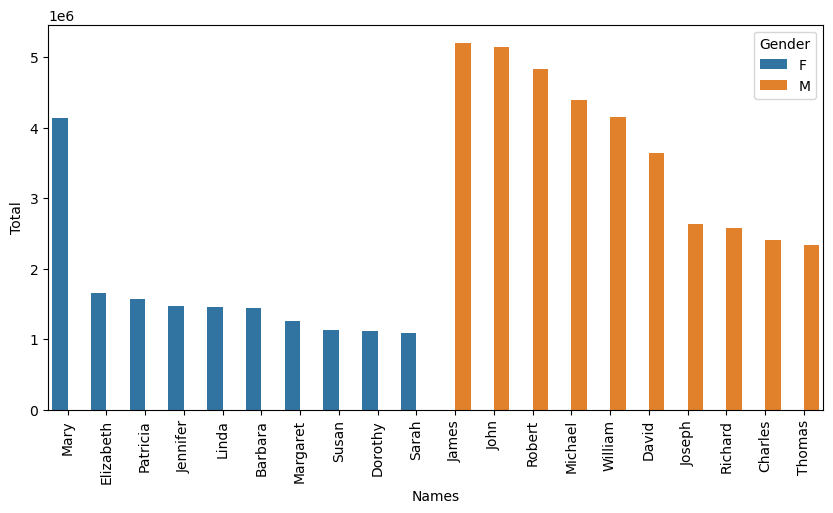

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x="Names", y="Total", hue='Gender', data=most_popular_all)
plt.xticks(rotation=90)
plt.show()

Trends over time

In [35]:
baby_names_per_year = df.groupby('Year').Count.sum()

In [36]:
baby_names_per_year

Year
1880     201484
1881     192690
1882     221533
1883     216944
1884     243461
         ...   
2017    3570234
2018    3508655
2019    3461444
2020    3327419
2021    3361375
Name: Count, Length: 142, dtype: int64

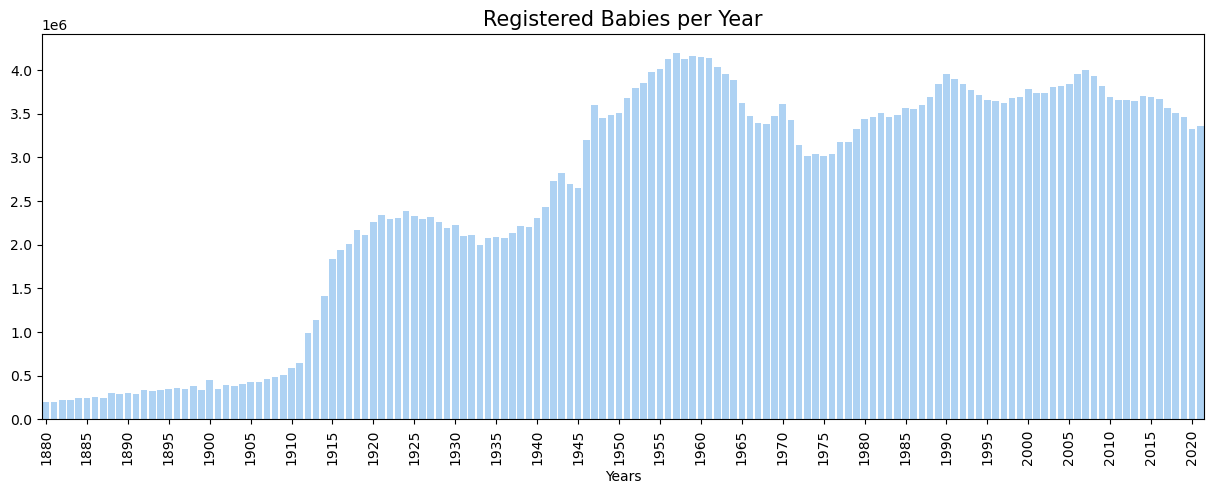

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(data=baby_names_per_year, x=baby_names_per_year.index, y=baby_names_per_year.values, order=baby_names_per_year.values, color='#a2d2ff')
plt.xticks(ticks = (range(0, len(baby_names_per_year), 5)), labels =  range(1880, 2021, 5), rotation=90)
plt.title("Registered Babies per Year", fontsize = 15)
plt.xlabel('Years')
plt.show()

In [38]:
diff_names_by_year = df.groupby('Year').Names.count()
diff_names_by_year

Year
1880     2000
1881     1934
1882     2127
1883     2084
1884     2297
        ...  
2017    32648
2018    32196
2019    32073
2020    31453
2021    31537
Name: Names, Length: 142, dtype: int64

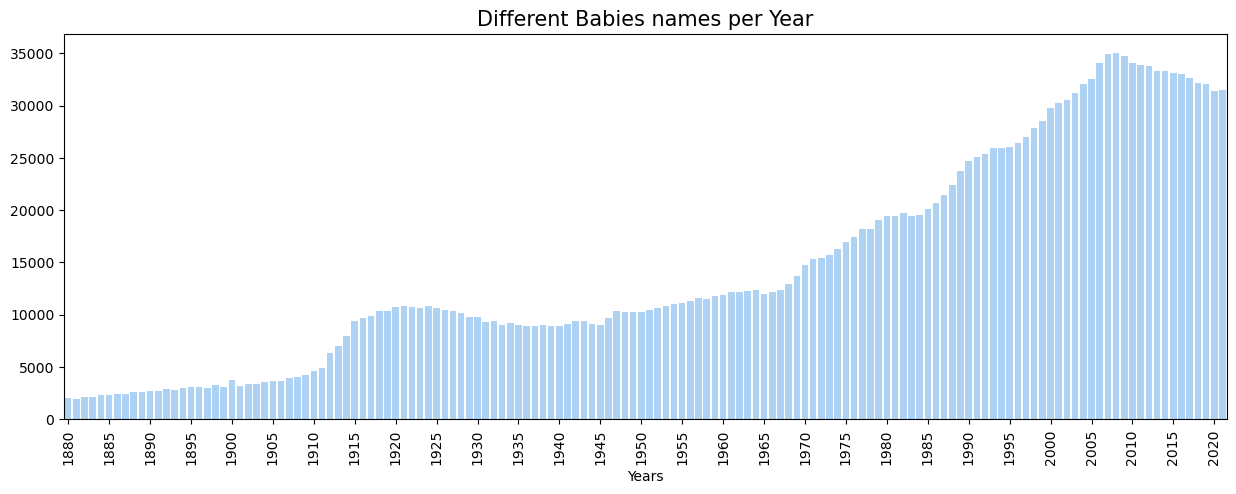

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(data=diff_names_by_year, x=diff_names_by_year.index, y=diff_names_by_year.values, order=diff_names_by_year.values, color='#a2d2ff')
plt.xticks(ticks = (range(0, len(diff_names_by_year), 5)), labels =  range(1880, 2021, 5), rotation=90)
plt.title("Different Babies names per Year", fontsize = 15)
plt.xlabel('Years')
plt.show()

Creating the popularity column (per million)

In [40]:
df

,Year,Names,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2052776,2021,Zyeire,M,5
2052777,2021,Zyel,M,5
2052778,2021,Zyian,M,5
2052779,2021,Zylar,M,5


In [41]:
# Names quantities by gender and year

df.groupby(['Year', 'Gender']).Count.sum()


Year  Gender
1880  F           90994
      M          110490
1881  F           91953
      M          100737
1882  F          107847
                 ...   
2019  M         1788414
2020  F         1609171
      M         1718248
2021  F         1627098
      M         1734277
Name: Count, Length: 284, dtype: int64

In [42]:
# Quantities of names per year divided by the total names per year multiplied by 1 million = Popularity per million

df['Popularity'] = df.Count.div(df.groupby(['Year', 'Gender']).Count.transform('sum'))*1000000
df['Popularity']

0          77642.481922
1          28617.271468
2          22012.440381
3          21309.097303
4          19188.078335
               ...     
2052776        2.883046
2052777        2.883046
2052778        2.883046
2052779        2.883046
2052780        2.883046
Name: Popularity, Length: 2052781, dtype: float64

In [44]:
df['Popularity'] = round(df.Count.div(df.groupby(['Year', 'Gender']).Count.transform('sum'))*1000000)
df['Popularity']

0          77642.0
1          28617.0
2          22012.0
3          21309.0
4          19188.0
            ...   
2052776        3.0
2052777        3.0
2052778        3.0
2052779        3.0
2052780        3.0
Name: Popularity, Length: 2052781, dtype: float64

Rank column by gender and year

In [49]:
df['Rank'] = df.groupby(['Year', 'Gender']).Count.apply(lambda x : x.rank(ascending=False))

In [50]:
df

,Year,Names,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.0,1.0
1,1880,Anna,F,2604,28617.0,2.0
2,1880,Emma,F,2003,22012.0,3.0
3,1880,Elizabeth,F,1939,21309.0,4.0
4,1880,Minnie,F,1746,19188.0,5.0
...,...,...,...,...,...,...
2052776,2021,Zyeire,M,5,3.0,13023.0
2052777,2021,Zyel,M,5,3.0,13023.0
2052778,2021,Zyian,M,5,3.0,13023.0
2052779,2021,Zylar,M,5,3.0,13023.0
